# Inspect the results of training KANs with MNIST & variants

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load results from files
f = open('test_results_MNIST_2.pickle', 'rb')
mnist_res = pickle.load(f)
f.close()

f = open('test_results_fashionMNIST_2.pickle', 'rb')
fashion_mnist_res = pickle.load(f)
f.close()

f = open('test_results_kannadaMNIST_2.pickle', 'rb')
kannada_mnist_res = pickle.load(f)
f.close()

### util funcs

In [3]:
def extract_data_arrays(res):
    model_type = []
    num_params = []
    test_acc_highest = []
    for el in res:
        model_type.append((el['model_type'], el['width']))
        num_params.append(el['num_params'][0])
        test_acc_highest.append(max(el['train_result']['test_acc']))
    return model_type, num_params, test_acc_highest

In [4]:
# put the result sets in groups
group_map = {'kan': 1, 'convkan': 2, 'mlp': 3}
color_dict = {1: 'blue', 2: 'purple', 3: 'orange'}

def type_to_group_num(mtype):
    return [group_map[t[0]] for t in mtype]

def type_to_group(mtype):
    return [t[0] for t in mtype]

### plot graph

##### first tries

In [5]:
mtype, nparam, acc = extract_data_arrays(mnist_res)

In [6]:
nparam = np.array(nparam)
acc = np.array(acc)
grp = np.array(type_to_group(mtype))

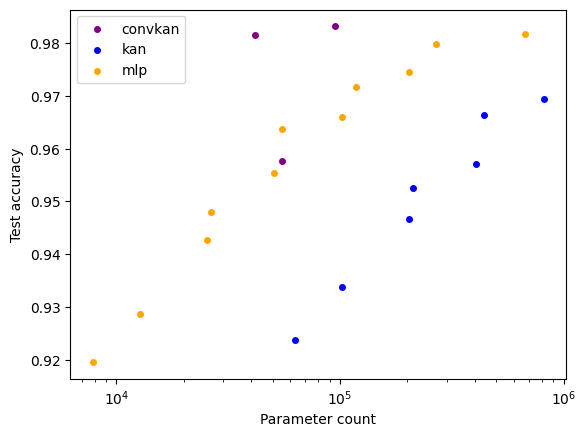

In [7]:
fig, ax = plt.subplots()
for g in np.unique(grp):
    ix = np.where(grp == g)
    ax.scatter(nparam[ix], acc[ix], c = color_dict[group_map[g]], label = g, s = 16)

ax.legend()
ax.set_xscale('log')
ax.set_xlabel('Parameter count')
ax.set_ylabel('Test accuracy')

plt.show()

##### as its own function

In [8]:
def generate_tradeoff_graph(res):
    # extract model type, num of params, and highest accuracy
    mtype, nparam, acc = extract_data_arrays(res)
    nparam = np.array(nparam)
    acc = np.array(acc)

    # use label by group
    grp = np.array(type_to_group(mtype))
    
    fig, ax = plt.subplots()
    for g in np.unique(grp):
        ix = np.where(grp == g)
        ax.scatter(nparam[ix], acc[ix], c = color_dict[group_map[g]], label = g, s = 16)

    # graph settings
    ax.legend()
    ax.set_xscale('log')
    ax.set_xlabel('Parameter count')
    ax.set_ylabel('Test accuracy')

    plt.show()

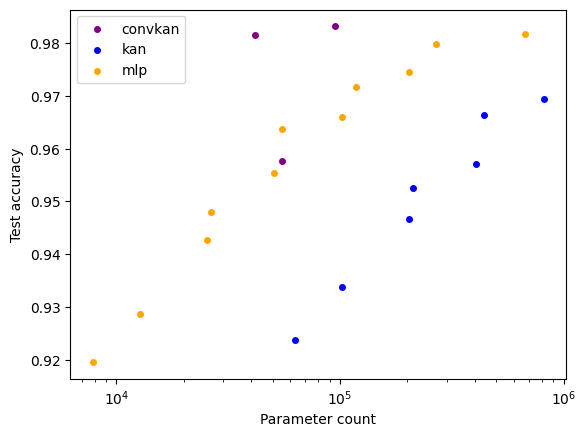

In [9]:
generate_tradeoff_graph(mnist_res)

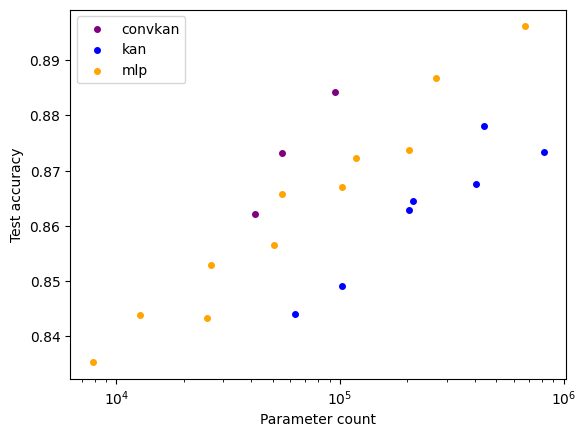

In [10]:
generate_tradeoff_graph(fashion_mnist_res)

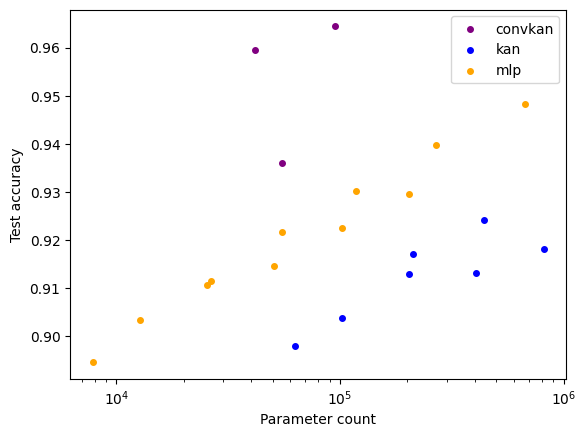

In [11]:
generate_tradeoff_graph(kannada_mnist_res)

### Bar graphs

In [12]:
def extract_train_time_data(res):
    type_lis = []
    time_lis = []
    color_lis = []
    for el in res:
        type_lis.append(el['model_type'] + '-' + str(el['width']))
        time_lis.append(el['train_time'])
        color_lis.append(color_dict[group_map[el['model_type']]])
    return type_lis, time_lis, color_lis

In [13]:
def extract_train_time_data_noconv(res):
    type_lis = []
    time_lis = []
    color_lis = []
    for el in res:
        if el['model_type'] == 'convkan':
            continue
        type_lis.append(el['model_type'] + '-' + str(el['width']))
        time_lis.append(el['train_time'])
        color_lis.append(color_dict[group_map[el['model_type']]])
    return type_lis, time_lis, color_lis

In [14]:
type_lis, orig_time_lis, color_lis = extract_train_time_data_noconv(mnist_res)
type_lis, fashion_time_lis, color_lis = extract_train_time_data_noconv(fashion_mnist_res)
type_lis, kannada_time_lis, color_lis = extract_train_time_data_noconv(kannada_mnist_res)

orig_time_lis = np.array(orig_time_lis)
fashion_time_lis = np.array(fashion_time_lis)
kannada_time_lis = np.array(kannada_time_lis)

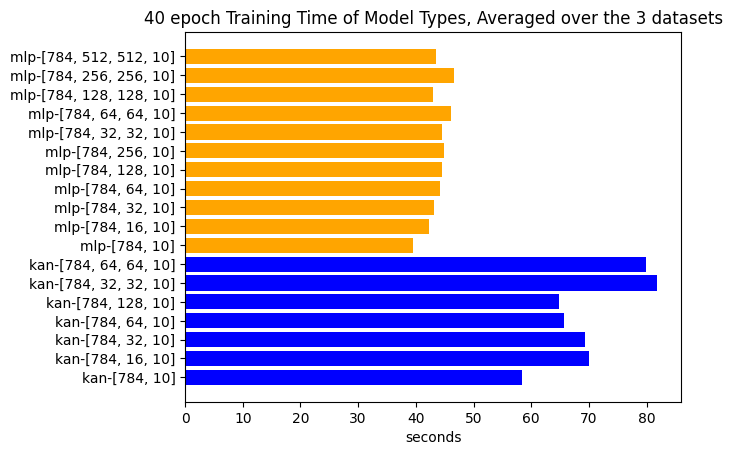

In [16]:
# take average of the three runs
avg_time_lis = (orig_time_lis + fashion_time_lis + kannada_time_lis) / 3.

plt.barh(type_lis, kannada_time_lis, color=color_lis)
plt.title('40 epoch Training Time of Model Types, Averaged over the 3 datasets')
plt.xlabel('seconds')
plt.show()

In [17]:
type_lis, orig_time_lis, color_lis = extract_train_time_data(mnist_res)
type_lis, fashion_time_lis, color_lis = extract_train_time_data(fashion_mnist_res)
type_lis, kannada_time_lis, color_lis = extract_train_time_data(kannada_mnist_res)

orig_time_lis = np.array(orig_time_lis)
fashion_time_lis = np.array(fashion_time_lis)
kannada_time_lis = np.array(kannada_time_lis)

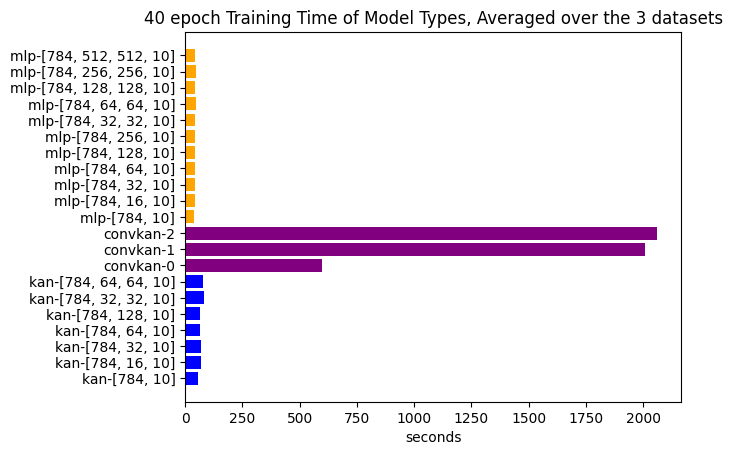

In [18]:
# take average of the three runs
avg_time_lis = (orig_time_lis + fashion_time_lis + kannada_time_lis) / 3.

plt.barh(type_lis, kannada_time_lis, color=color_lis)
plt.title('40 epoch Training Time of Model Types, Averaged over the 3 datasets')
plt.xlabel('seconds')
plt.show()